<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-2/blob/main/7%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_1014_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 개정2판 ch9. 1~4

p.584-601

# [Chapter 9] 추천 시스템

## 9-1. 추천 시스템의 개요와 배경

### 추천 시스템의 개요

### 온라인 스토어의 필수 요소, 추천 시스템

- 추천 시스템 : 사용자가 무엇을 원하는지 빠르게 찾아내 사용자의 온라인 쇼핑의 즐거움을 배가시킴
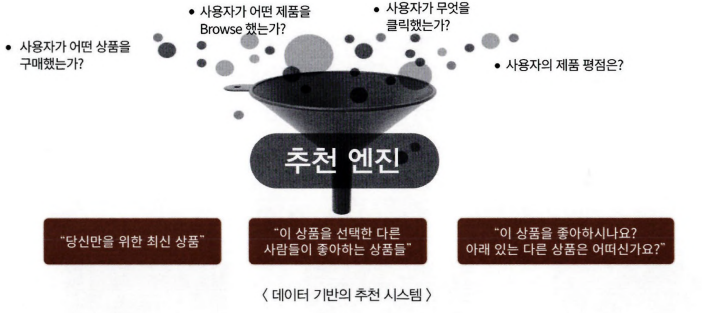

### 추천 시스템의 유형

- 콘텐츠 기반 필터링(Content based filtering)
- 협업 필터링(Collaborative filtering)
  - 최근접 이웃(Nearest Neigbor) 협업 필터링
  - 잠재 요인(Latent Factor) 협업 필터링 : 행렬 분해 기법 이용

## 9-2. 콘텐츠 기반 필터링 추천 시스템

- 콘텐츠 기반 필터링 : 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템 추천하는 방식


## 9-3. 최근접 이웃 협업 필터링

- 협업 필터링 : 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행
  - 주요 목표 : 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)
  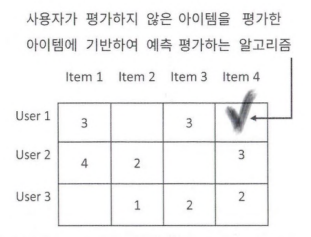

- 사용자 기반(User-User)
  - 특정 사용자와 유사한 다른 사용자를 Top-N으로 선정해 Top-N 사용자가 좋아하는 아이템을 추천하는 방식
  - 특정 사용자와 타 사용자 간의 유사도(Similarity) 측정 후, 가장 유사도가 높은 Top-N 사용자를 추출해 선호하는 아이템 추천
- 아이템 기반(Item-Item)
  - 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천

## 9-4. 잠재 요인 협업 필터링

### 잠재 요인 협업 필터링의 이해

- 잠재 요인 협업 필터링 : 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
- 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출 -> 행렬 분해(Matrix Factorization)

### 행렬 분해의 이해

- 행렬 분해 : 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법
  - SVD(Singular Vector Decomposition)
  - NMF(Non-Negative Matrix Factorization)

  

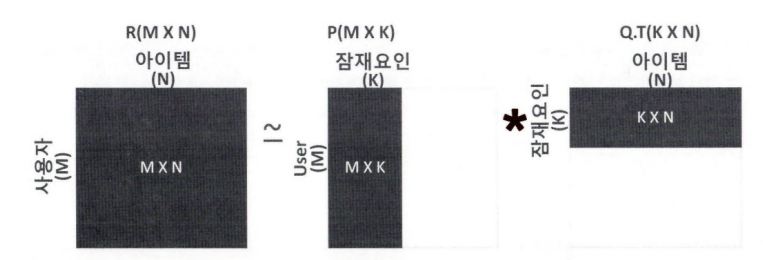

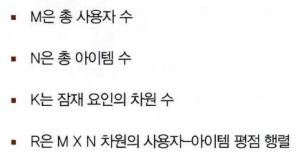

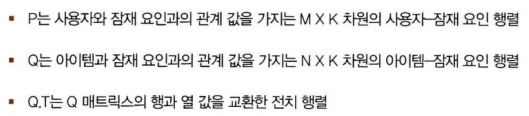

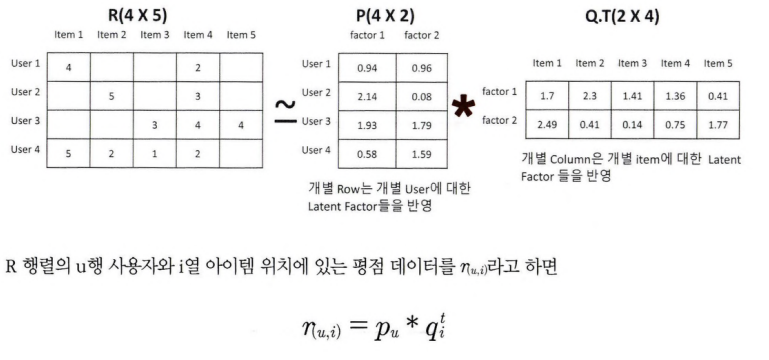

### 확률적 경사 하강법을 이용한 행렬 분해

- 확률적 경사 하강법을 이용해 행렬 분해 : P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P, Q 유추

1. P, Q를 임의의 값을 가진 행렬로 설정
2. P, Q.T 값을 곱해 예측 R 행렬 계산, 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산
3. 이 오류 값을 최소화할 수 있도록 P, Q 행렬을 적절한 값으로 각각 업데이트
4. 만족할 만한 오류 값을 가질때까지 2,3번 반복하면서 P, Q 값을 업데이트해 근사화

- 실제 값과 예측값의 오류 최소화와 L2 규제를 고려한 비용 함수식
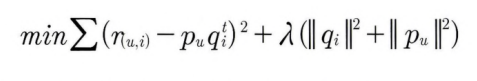

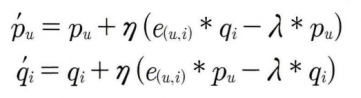

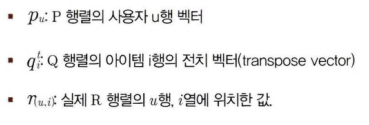

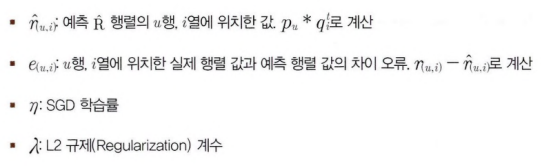

In [ ]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3 설정.
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
num_users, num_items = R.shape
K=3

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [ ]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)

    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]

    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)

    return rmse

- SGD 기반으로 행렬 분해 수행
  - steps : SGD를 반복해서 업데이트할 횟수
  - learning_rate : SGD의 학습률
  - r_lambda : L2 Regularization 계수

In [ ]:
# R > 0인 행 위치, 열 위치, 값을 non_zeors 리스트에 저장.
non_zeros = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i, :], Q[j, :].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i, :] = P[i, :] + learning_rate*(eij * Q[j, :] - r_lambda*P[i, :])
    Q[j, :] = Q[j, :] + learning_rate*(eij * P[i, :] - r_lambda*Q[j, :])

  rmse = get_rmse(R, P, Q, non_zeros)
  if (step % 50) == 0 :
    print('### iteration step : ', step, 'rmse : ', rmse)

### iteration step :  0 rmse :  3.2388050277987723
### iteration step :  50 rmse :  0.4876723101369648
### iteration step :  100 rmse :  0.1564340384819247
### iteration step :  150 rmse :  0.07455141311978046
### iteration step :  200 rmse :  0.04325226798579314
### iteration step :  250 rmse :  0.029248328780878973
### iteration step :  300 rmse :  0.022621116143829466
### iteration step :  350 rmse :  0.019493636196525135
### iteration step :  400 rmse :  0.018022719092132704
### iteration step :  450 rmse :  0.01731968595344266
### iteration step :  500 rmse :  0.016973657887570753
### iteration step :  550 rmse :  0.016796804595895633
### iteration step :  600 rmse :  0.01670132290188466
### iteration step :  650 rmse :  0.01664473691247669
### iteration step :  700 rmse :  0.016605910068210026
### iteration step :  750 rmse :  0.016574200475705
### iteration step :  800 rmse :  0.01654431582921597
### iteration step :  850 rmse :  0.01651375177473524
### iteration step :  900 rms

In [ ]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


- 원본 행렬과 비교해 널이 아닌 값은 큰 차이 X
- 널인 값은 새로운 예측값으로 채워짐